In [1]:
using Distributions, Plots
default(size=(800,600))

In [2]:
lambda_c=50.0
lambda_a=5.0

area_a = 4;

Na = 20#rand(Poisson(lambda_a*area_a))

xa = rand(Uniform(-1,1),Na,2)

Nc = 200#rand(Poisson(lambda_c*area_a))
xc = rand(Uniform(-1,1),Nc,2);

In [3]:
d(x,y) = sum(abs.(x-y)) #norma 1
W = [d(xa[i,:],xc[j,:]) for i=1:Na,j=1:Nc]

attachs = zeros(Nc)

for j=1:Nc    
    _,idx = findmin(W[:,j])
    attachs[j] = idx
end
attachs=Int64.(attachs);

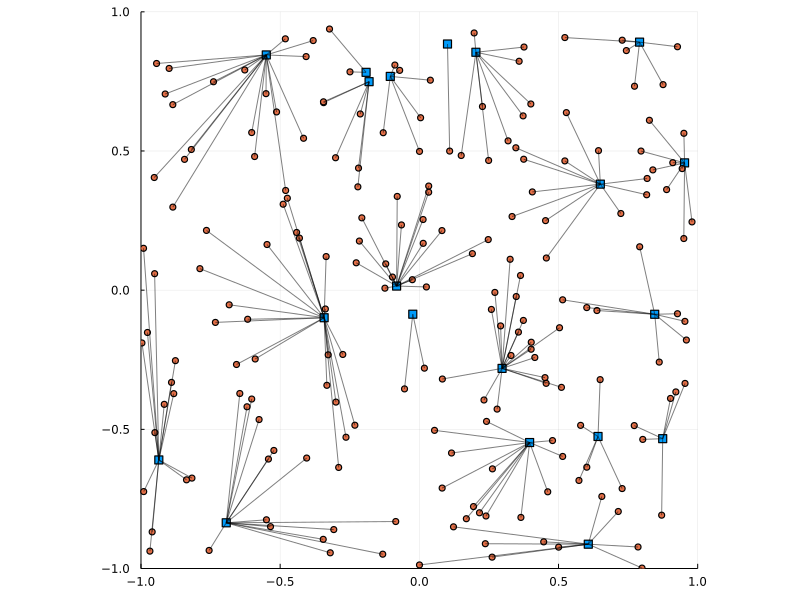

In [4]:
scatter(xa[:,1],xa[:,2], xlims=(-1,1), ylims=(-1,1), aspectratio=:equal, marker=:square)
scatter!(xc[:,1], xc[:,2], legend=:none, colorbar=:none)

for i=1:Nc
    plot!([xc[i,1],xa[attachs[i],1]], [xc[i,2],xa[attachs[i],2]], color=:black, alpha=0.5)
end

plot!()

In [5]:
using JuMP, Gurobi

n=size(xa,1)
m=size(xc,1)

model = JuMP.Model(Gurobi.Optimizer)

@variable(model,pi[1:m,1:n]>=0)

@constraint(model, sum(pi,dims=2).== ones(m))
@constraint(model, sum(pi,dims=1).<= 12*ones(1,n))

@objective(model,Min,sum(pi.*W'))

optimize!(model)

sol = value.(pi)

for i=1:Nc    
    _,idx = findmax(sol[i,:])
    attachs[i] = idx
end

attachs = Int64.(attachs);

Set parameter Username
Academic license - for non-commercial use only - expires 2022-05-16
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 220 rows, 4000 columns and 8000 nonzeros
Model fingerprint: 0x979b289f
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-02, 4e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+01]
Presolve time: 0.00s
Presolved: 220 rows, 4000 columns, 8000 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    6.1234300e+01   3.400000e+01   0.000000e+00      0s
      74    6.6381410e+01   0.000000e+00   0.000000e+00      0s

Solved in 74 iterations and 0.00 seconds (0.00 work units)
Optimal objective  6.638141036e+01

User-callback calls 112, time in user-callback 0.00 sec


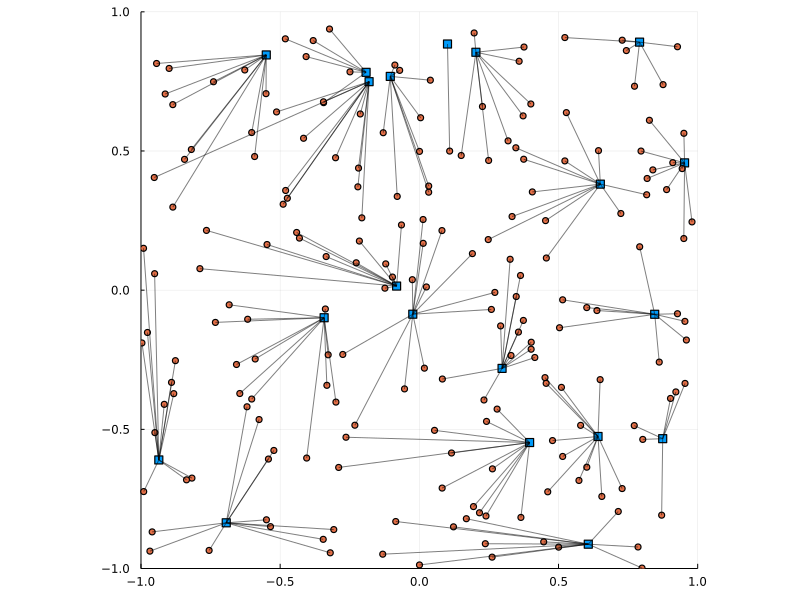

In [6]:
scatter(xa[:,1],xa[:,2], xlims=(-1,1), ylims=(-1,1), aspectratio=:equal, marker=:square)
scatter!(xc[:,1], xc[:,2], legend=:none, colorbar=:none)

for i=1:Nc
    plot!([xc[i,1],xa[attachs[i],1]], [xc[i,2],xa[attachs[i],2]], color=:black, alpha=0.5)
end
plot!()